# Section 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
hotels = pd.read_excel('/Users/puchku-home/Study/Python Libs/Data Viz with Matplotlib & Seaborn/Data/HotelCustomersDataset.xlsx')

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64[ns]")

In [6]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [8]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    83590 non-null  int64         
 1   Nationality           83590 non-null  object        
 2   Age                   79811 non-null  float64       
 3   DaysSinceCreation     83590 non-null  int64         
 4   AverageLeadTime       83590 non-null  int64         
 5   LodgingRevenue        83590 non-null  float64       
 6   OtherRevenue          83590 non-null  float64       
 7   BookingsCanceled      83590 non-null  int64         
 8   BookingsNoShowed      83590 non-null  int64         
 9   BookingsCheckedIn     83590 non-null  int64         
 10  PersonsNights         83590 non-null  int64         
 11  RoomNights            83590 non-null  int64         
 12  DaysSinceLastStay     83590 non-null  int64         
 13  DaysSinceFirstSt

In [10]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("ME").sum()



In [12]:
monthly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


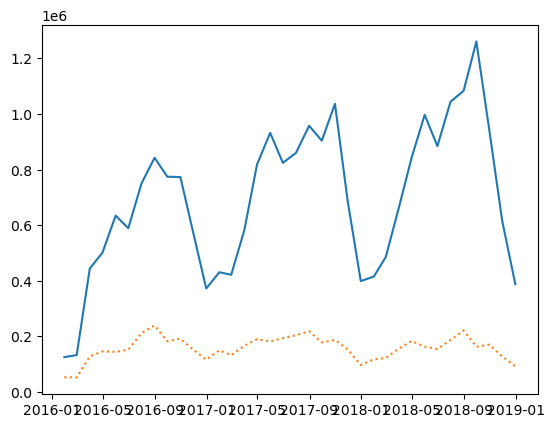

In [14]:
fig , ax = plt.subplots()
ax.plot(monthly_revenue.index,monthly_revenue["LodgingRevenue"])
ax.plot(monthly_revenue.index,monthly_revenue["OtherRevenue"], ls = ":")


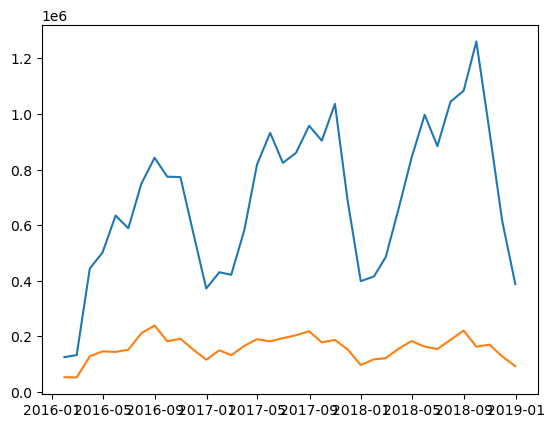

In [16]:
fig = plt.figure()
ax=fig.add_subplot()
ax.plot(monthly_revenue)

# Section 2

In [19]:
daily_revenue = hotels.groupby("date").agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})

monthly_revenue = daily_revenue.resample("ME").sum()

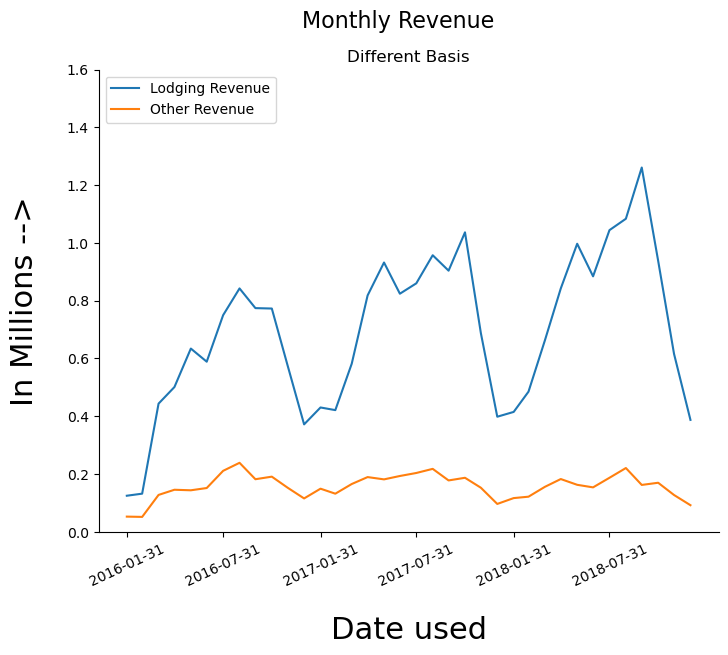

In [21]:
fig,ax = plt.subplots(figsize=(8,6))

ax.plot(monthly_revenue.index,monthly_revenue["LodgingRevenue"]/1000000,label="Lodging Revenue")
ax.plot(monthly_revenue.index,monthly_revenue["OtherRevenue"]/1000000,label="Other Revenue")

ax.spines[["top","right"]].set_visible(False)

fig.suptitle("Monthly Revenue",fontsize = 16)
ax.set_title("Different Basis",fontsize=12)

ax.set_xlabel("Date used", fontsize =22,labelpad=20)
ax.set_ylabel("In Millions -->",fontsize =22,labelpad =20)

ax.set_ylim(0,1.6)
ax.set_xticks(monthly_revenue.index[::6])
plt.xticks(rotation=25)


ax.legend(loc="upper left")

# Section 3

In [24]:
room_nights = hotels.groupby("date").agg({"RoomNights":"sum", "BookingsCanceled":"sum"})

monthly_bookings = room_nights.resample("QE").sum()

In [26]:
monthly_bookings.head()

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26
2016-09-30,19517,27
2016-12-31,15404,17
2017-03-31,15206,12


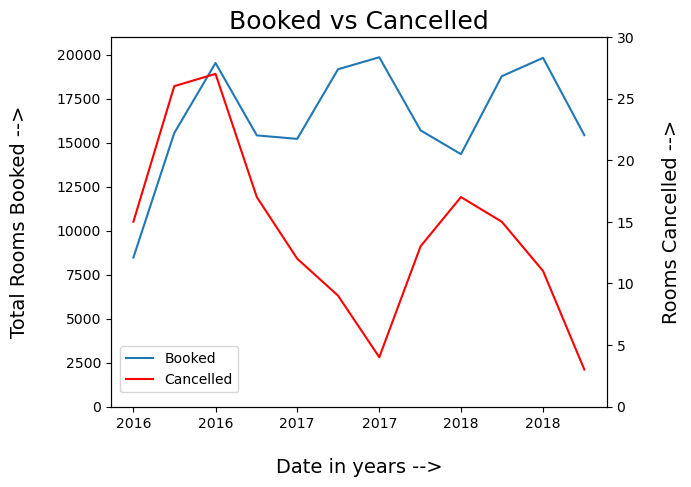

In [28]:
fig , ax = plt.subplots()
ax.plot(monthly_bookings.index,monthly_bookings["RoomNights"], label="Booked")

ax.set_xticks(monthly_bookings.index[::2])
ax.set_title("Booked vs Cancelled", fontsize =18)
ax.set_ylim(0,21000)
ax.set_ylabel("Total Rooms Booked -->",labelpad = 20,fontsize=14)

ax2=ax.twinx()

ax2.plot(monthly_bookings.index,monthly_bookings["BookingsCanceled"], label="Cancelled",color="red")
ax2.set_ylim(0,30)
ax2.set_ylabel("Rooms Cancelled -->",labelpad = 20,fontsize=14)

ax.set_xlabel("Date in years -->",labelpad = 20,fontsize=14)
fig.legend(bbox_to_anchor=(.335,.25))


# Section 4

In [31]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [33]:
countries = hotels.groupby("Nationality").agg({"RoomNights":"sum", "LodgingRevenue":"sum"}).sort_values("RoomNights", ascending=False).iloc[:10]

In [35]:
countries.head()

,RoomNights,LodgingRevenue
Nationality,,
FRA,31018,3809315.59
DEU,26334,3113382.55
PRT,24334,2715008.72
GBR,20822,2693123.61
ESP,10877,1475909.33


Text(0, 0.5, 'Total Rooms Booked--->')

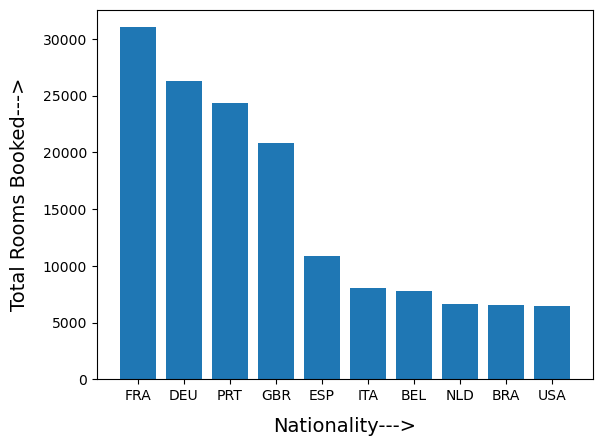

In [37]:
fig , ax = plt.subplots()
ax.bar(countries.index,countries["RoomNights"])

ax.set_xlabel("Nationality--->",fontsize =14,labelpad=10)
ax.set_ylabel("Total Rooms Booked--->",fontsize =14,labelpad=10)

Text(0.5, 0, 'Lodging Revenue--->')

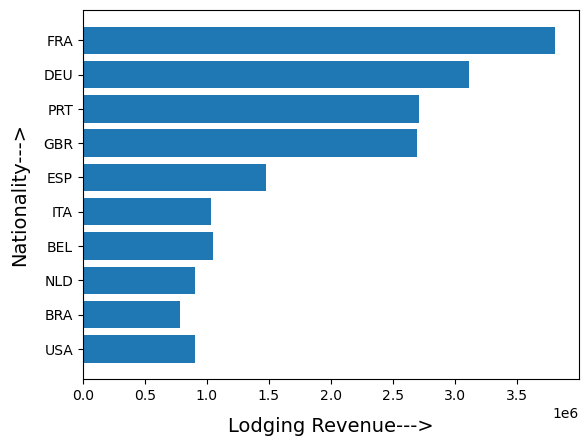

In [39]:
fig , ax = plt.subplots()
ax.barh(countries.index[::-1],countries["LodgingRevenue"][::-1])

ax.set_ylabel("Nationality--->",fontsize =14,labelpad=10)
ax.set_xlabel("Lodging Revenue--->",fontsize =14,labelpad=10)

# Section 5

In [42]:
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]

country_subset = (hotels
                  .loc[hotels["Nationality"].isin(countries)]
                  .groupby("Nationality")
                  .agg({"LodgingRevenue": "sum", "OtherRevenue":"sum" })
                  .sort_values("LodgingRevenue", ascending=False))

country_subset.head()

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


<Axes: xlabel='Nationality'>

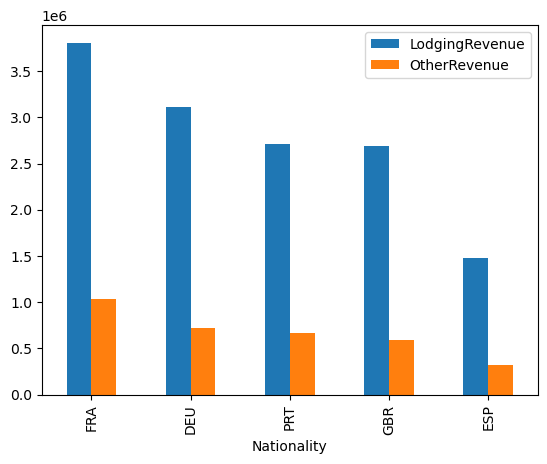

In [44]:
country_subset.plot.bar()

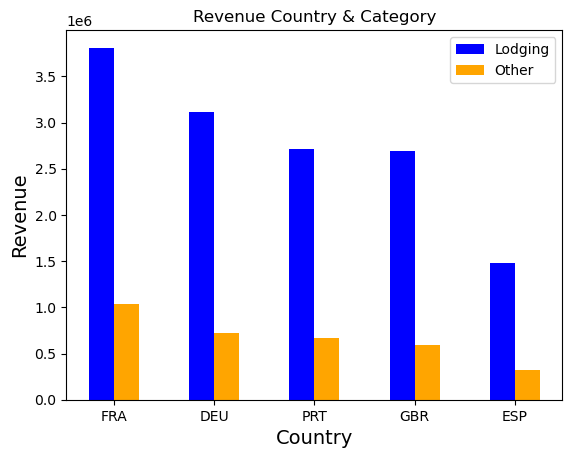

In [46]:
fig,ax = plt.subplots()

x=np.arange(len(country_subset))

width = 0.25

ax.bar(
    x-width/2,
    country_subset["LodgingRevenue"],
    width=width,
    label = "Lodging",
    color ="blue"
)

ax.bar(
    x+width/2,
    country_subset["OtherRevenue"],
    width=width,
    label = "Other",
    color ="orange"
)

ax.set_xlabel("Country",fontsize = 14)
ax.set_ylabel("Revenue",fontsize =14)

ax.set_title("Revenue Country & Category")

plt.xticks(x,country_subset.index)

ax.legend()

In [48]:
country_subset_2 =country_subset.apply(lambda x : x*100/sum(x),axis =1)

In [50]:
country_subset_2.head()

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,78.664529,21.335471
DEU,81.100394,18.899606
PRT,80.310417,19.689583
GBR,81.999019,18.000981
ESP,82.189013,17.810987


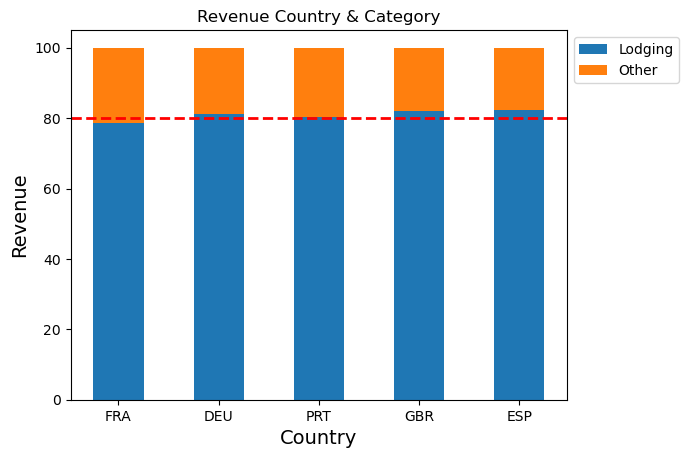

In [52]:
fig,ax = plt.subplots()

x=np.arange(len(country_subset_2))

width = 0.5

ax.bar(
    country_subset_2.index,
    country_subset_2["LodgingRevenue"],
    width=width,
    label = "Lodging",
)

ax.bar(
    country_subset_2.index,
    country_subset_2["OtherRevenue"],
    width=width,
    label = "Other",
    bottom = country_subset_2["LodgingRevenue"],
)

ax.axhline(80,color = "red", linewidth =2,linestyle = "--")

ax.set_xlabel("Country",fontsize = 14)
ax.set_ylabel("Revenue",fontsize =14)

ax.set_title("Revenue Country & Category")

ax.legend(bbox_to_anchor=(1,1))

# Section 6

In [55]:
country_pcts = (hotels
                .groupby("Nationality")
                .agg({"LodgingRevenue": "sum"})
                .sort_values("LodgingRevenue", ascending=False)
                .apply(lambda x: x * 100 / sum(x)))

In [57]:
pie_data = (pd.concat([country_pcts.iloc[:5], 
                       pd.DataFrame(
                           {
                               "LodgingRevenue": country_pcts.iloc[5:, 0].sum()
                           }
                           , index=["OTH"])]
                     )
           ).iloc[::-1]

In [59]:
pie_data.head()

,LodgingRevenue
OTH,44.721890
ESP,5.909105
GBR,10.782472
PRT,10.870093
DEU,12.465065


([<matplotlib.patches.Wedge at 0x31916a4b0>,
 [Text(-1.0849122638816313, 0.18156370694396443, 'OTH'),
  Text(-0.1600229134049907, -1.0882980599015046, 'ESP'),
  Text(0.40636518087711426, -1.0221875267145017, 'GBR'),
  Text(0.958849775783756, -0.5390798711503157, 'PRT'),
  Text(1.073265274059313, 0.2410428416244462, 'DEU'),
  Text(0.5071140009094907, 0.9761328752181074, 'FRA')],
 [Text(-0.7397129071920213, 0.123793436552703, '44.7%'),
  Text(-0.1091065318670391, -0.7420214044782986, '5.9%'),
  Text(0.2770671687798506, -0.6969460409417058, '10.8%'),
  Text(0.6537612107616517, -0.36755445760248795, '10.9%'),
  Text(0.7317717777677133, 0.16434739201666784, '12.5%'),
  Text(0.3457595460746527, 0.6655451421941642, '15.3%')])

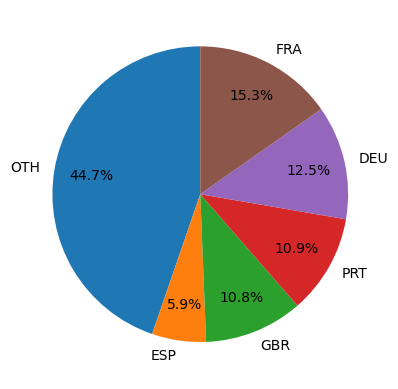

In [61]:
fig,ax = plt.subplots()

ax.pie(
    pie_data["LodgingRevenue"],
    labels = pie_data.index,
    startangle=90,
    autopct = "%.1f%%",
    pctdistance = .75
)

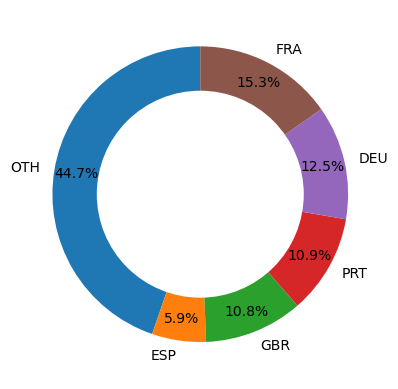

In [63]:
fig,ax = plt.subplots()

ax.pie(
    pie_data["LodgingRevenue"],
    labels = pie_data.index,
    startangle=90,
    autopct = "%.1f%%",
    pctdistance = .85
)

donut= plt.Circle((0,0),0.7,facecolor="white")
fig = plt.gcf()
ax=fig.gca()
ax.add_artist(donut)

# Section 7

In [65]:
hotels = hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                       revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"]
                      )

In [105]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date,total_revenue,revenue_per_night
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,2018-08-03,476.3,95.26
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,2016-01-01,333.0,66.60
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,2016-01-01,0.0,NaN
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,2016-01-01,300.0,60.00
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,2016-01-01,0.0,NaN


In [67]:
agg_hotels = hotels.groupby("Nationality").agg(
                                  total_revenue = ("total_revenue", "sum"),
                                  avg_revenue = ("total_revenue", "mean"),
                                  avg_age = ("Age", "mean"),
                                  avg_nights = ("RoomNights", "mean"),
                                  avg_nightly_revenue = ("revenue_per_night", "mean")
)

In [69]:
agg_hotels.head()

,total_revenue,avg_revenue,avg_age,avg_nights,avg_nightly_revenue
Nationality,,,,,
ABW,2153.22,717.740000,42.666667,3.666667,204.421111
AGO,115174.49,632.826868,41.681319,3.461538,177.745487
AIA,1290.10,430.033333,25.666667,1.666667,232.737500
ALB,4267.88,328.298462,35.153846,2.846154,118.783788
AND,3760.25,537.178571,43.285714,2.000000,283.452381


Text(0.5, 0, 'Average Revenue per customers -->')

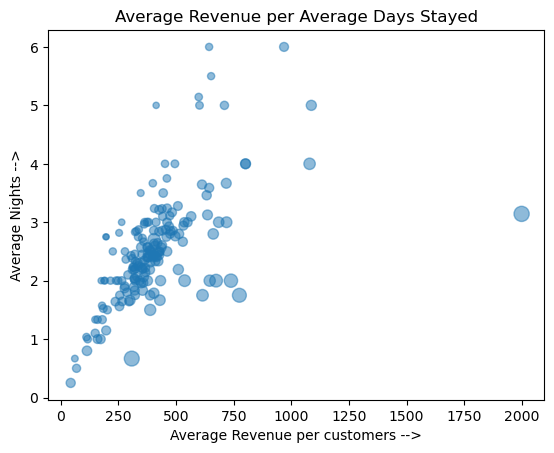

In [101]:
fig , ax = plt.subplots()

ax.scatter(
    x=agg_hotels["avg_revenue"],
    y=agg_hotels["avg_nights"],
    s = (agg_hotels["avg_nightly_revenue"] *0.25),
    alpha = 0.5
)

ax.set_title("Average Revenue per Average Days Stayed")
ax.set_ylabel("Average Nights -->")
ax.set_xlabel("Average Revenue per customers -->")

Text(0, 0.5, 'Count')

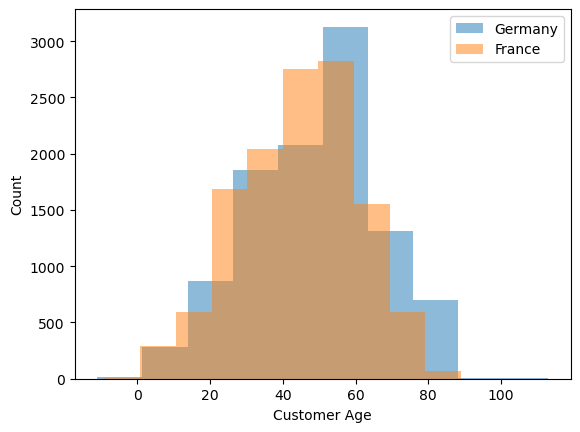

In [117]:
fig ,ax =plt.subplots()

ax.hist(
   hotels.loc[hotels["Nationality"] == "DEU", "Age"],
    alpha = 0.5,
    
    label ="Germany"
)

ax.hist(
   hotels.loc[hotels["Nationality"] == "FRA", "Age"],
    alpha = 0.5,
    
    label ="France"
)

ax.legend()

ax.set_xlabel("Customer Age")
ax.set_ylabel("Count")